
# Topic Modeling on IMDb Movie Reviews

**Group Members**: Sandra Lee  
**Submission Deadline**: Feb 09, 2025
**Presentation Dates**: Jan 16, 2025  

---

## **Introduction**
This project focuses on analyzing movie reviews using **Topic Modeling** techniques, particularly **Latent Dirichlet Allocation (LDA)**. The goal is to uncover hidden themes, such as acting, storyline, or cinematography, and provide meaningful insights into movie reviews. The project involves:
1. Data collection and preprocessing.
2. Application of LDA.
3. Optimization of the model with justified choices.
4. Visualization and discussion of results.

In [1]:
import pandas as pd

file_path = "movie_reviews.csv" 
df = pd.read_csv(file_path)

print(df.head())
print(df.isnull().sum())

df = df[['review']]
df = df.dropna()

print(df.info())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB
None


In [2]:
import re
#%pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess_text(text):
    try:
        text = text.lower()
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {text}, Error: {e}")
        return ''

df['review'] = df['review'].astype(str)

# Remove empty reviews
df = df[df['review'].str.strip() != '']

# drop rows where the review is missing or invalid
df = df.dropna(subset=['review'])

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/yvonnelee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yvonnelee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yvonnelee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yvonnelee/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# Display the processed text
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


In [5]:
# Check for missing or empty values
print(df['cleaned_review'].isnull().sum()) 
print(df['cleaned_review'].str.strip().eq('').sum())  

df = df[df['cleaned_review'].str.strip() != '']  

df['cleaned_review'] = df['cleaned_review'].astype(str)
print(df['cleaned_review'].head())

0
0
0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stunnin...
Name: cleaned_review, dtype: object


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_review'])


In [7]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(dtm)

# Display topics
def display_topics(model, feature_names, no_top_words=10):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)


Topic 1:
character make good time plot like horror scene br film
Topic 2:
man great love performance time character story life br film
Topic 3:
watch make time really bad good br like film movie
Topic 4:
really book good time like story character movie film br
Topic 5:
know guy people life make character time like movie br


In [8]:
import pyLDAvis
import pyLDAvis.gensim_models  # Use for Gensim LDA if needed
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
#%pip install pyLDAvis
#%pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, None]
doc_topic_dists = lda.transform(dtm)
doc_lengths = dtm.sum(axis=1).A1
vocab = vectorizer.get_feature_names_out()
term_frequency = dtm.sum(axis=0).A1


vis_data = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency,
    sort_topics=False,
)

pyLDAvis.display(vis_data)


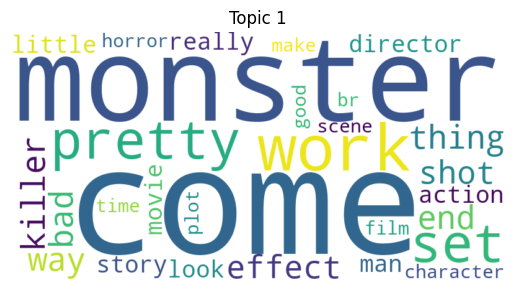

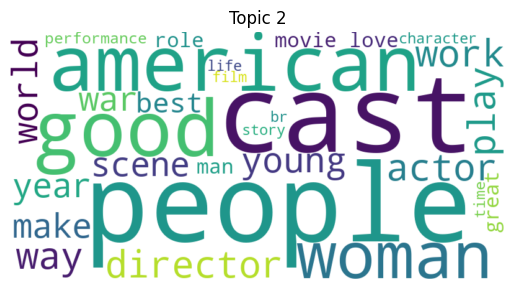

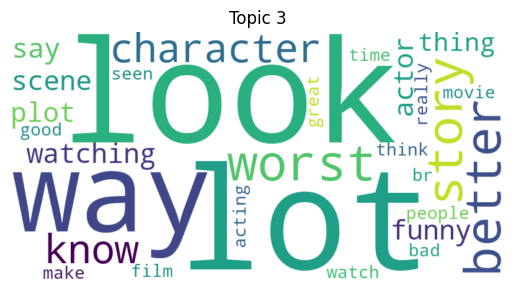

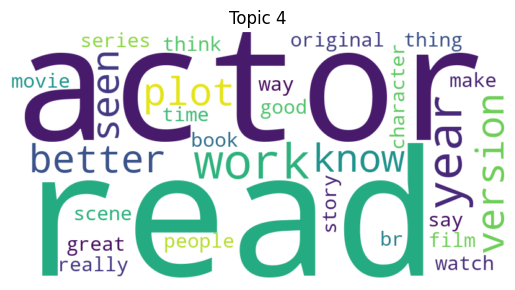

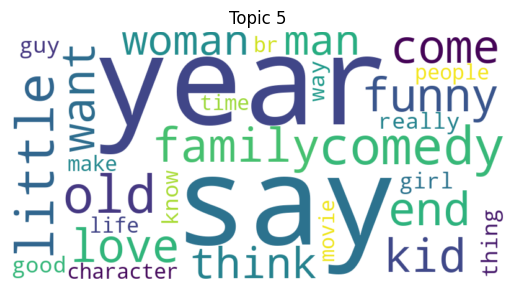

In [10]:

for index, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
        " ".join([feature_names[i] for i in topic.argsort()[-30:]])
    )
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {index + 1}")
    plt.show()


In [11]:

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
search_params = {'n_components': [3, 5, 7], 'learning_decay': [0.5, 0.7, 0.9]}
lda_model = LatentDirichletAllocation(random_state=42)

# Perform grid search
grid_search = GridSearchCV(lda_model, param_grid=search_params, cv=3)
grid_search.fit(dtm)

# Display the best parameters
best_lda = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Display topics for the optimized model
display_topics(best_lda, feature_names)


Best Parameters: {'learning_decay': 0.5, 'n_components': 3}
Topic 1:
story good make character time scene movie like film br
Topic 2:
great like love movie time life character story film br
Topic 3:
watch make bad time really good film like br movie


In [12]:
# pyLDAvis plot for top 3 topics
topic_term_dists = best_lda.components_ / best_lda.components_.sum(axis=1)[:, None]
doc_topic_dists = best_lda.transform(dtm)
doc_lengths = dtm.sum(axis=1).A1
vocab = vectorizer.get_feature_names_out()
term_frequency = dtm.sum(axis=0).A1

vis_data = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency,
    sort_topics=False,
)

pyLDAvis.display(vis_data)

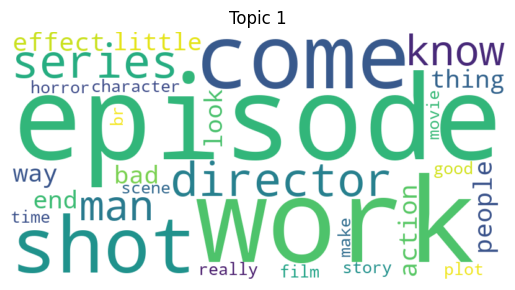

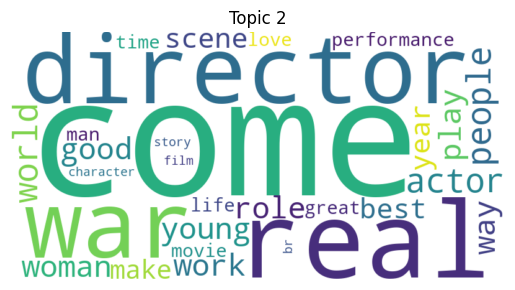

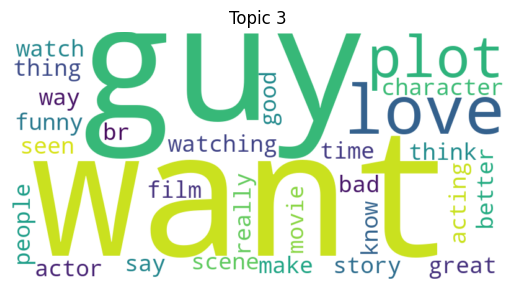

In [13]:
# word clouds for top 3 topics
for index, topic in enumerate(best_lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
        " ".join([feature_names[i] for i in topic.argsort()[-30:]])
    )
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {index + 1}")
    plt.show()


## **Results**
1. Key topics extracted:
   - Topic 1: story good make character time scene movie like film
   - Topic 2: great like love movie time life character story film 
   - Topic 3: watch make bad time really good film like movie
2. Optimal number of topics: 3
3. Challenges: Short reviews made topic separation slightly harder.

## **Discussion**
- **Strengths**: The model effectively identified broad themes in the reviews.
- **Limitations**: Some topics had overlapping words, requiring manual interpretation.
- **Future Work**: Include more complex models (e.g., BERTopic) or integrate sentiment analysis.
